In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
city_data_to_load='/Users/humbertorodriguez/Documents/Bootcamp_Data_Analyst/Module_5/Async/PyBer_Analysis/Resources/city_data.csv'
ride_data_to_load='/Users/humbertorodriguez/Documents/Bootcamp_Data_Analyst/Module_5/Async/PyBer_Analysis/Resources/ride_data.csv'

## Inspect the City Data DataFrame

In [3]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
#unique values type column
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
sum(city_data_df['type']=='Urban')

66

In [8]:
sum(city_data_df['type']=='Rural')

18

In [9]:
(city_data_df['type']=='Suburban').sum()

36

## Inspect the Ride DataFrame

In [10]:
# Get the columns and the rows that are null.

ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyber_data_df=pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Create DataFrames for Each Type of City

In [14]:
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']

In [15]:
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']

In [16]:
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']

## Get the Number of Rides for Each City Type

In [17]:
urban_ride_count=urban_cities_df.groupby(['city']).count()['ride_id']

In [18]:
suburban_ride_count=suburban_cities_df.groupby(['city']).count()['ride_id']

In [19]:
rural_ride_count=rural_cities_df.groupby(['city']).count()['ride_id']

## Get the Average Fare for Each City Type

In [20]:
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']

In [21]:
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']

In [22]:
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']

## Get the Average Number of Drivers for Each City Type

In [23]:
urban_driver_count=urban_cities_df.groupby(['city']).mean()['driver_count']

In [24]:
suburban_driver_count=suburban_cities_df.groupby(['city']).mean()['driver_count']

In [25]:
rural_driver_count=rural_cities_df.groupby(['city']).mean()['driver_count']

## Create Bubble Charts

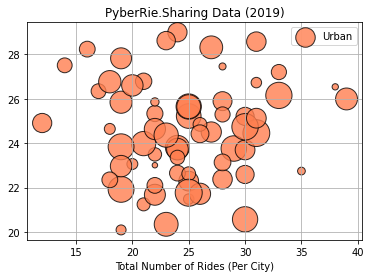

In [26]:
#Urban

urban_ride_count
urban_avg_fare

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
            label='Urban', c='coral', edgecolor='black', linewidths=1, alpha=.8)
plt.grid(True)
plt.legend()
plt.title('PyberRie.Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.show()

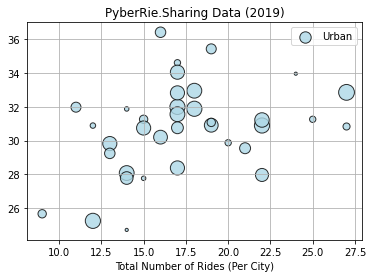

In [27]:
#Suburban

suburban_ride_count
suburban_avg_fare

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            label='Urban', c='lightblue',edgecolor='black', linewidths=1, alpha=.8)
plt.grid(True)
plt.legend()
plt.title('PyberRie.Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.show()

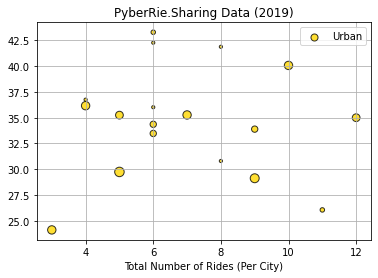

In [28]:
#Rural

rural_ride_count
rural_avg_fare
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            label='Urban', c='gold', edgecolor='black',linewidths=1 , alpha=.8)
plt.grid(True)
plt.legend()
plt.title('PyberRie.Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.show()

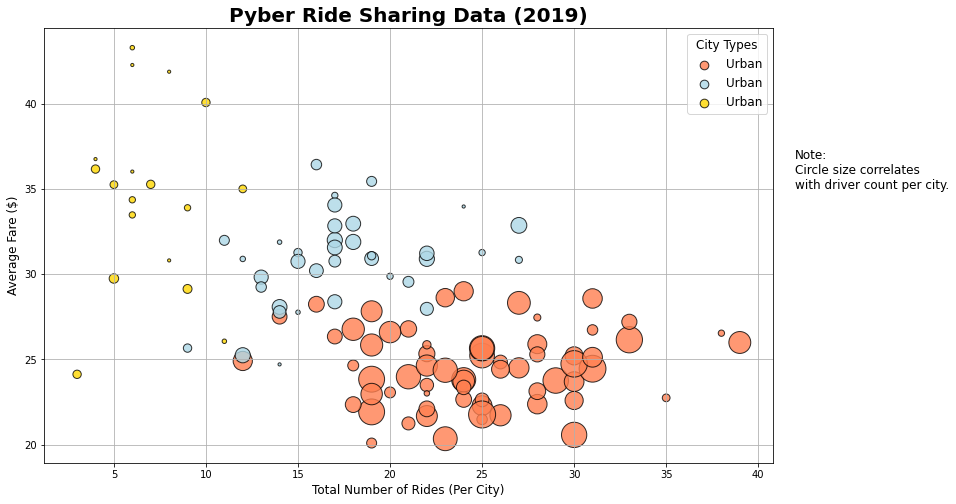

In [29]:
plt.figure(figsize=(15,8))

#Urban
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
            label='Urban', c='coral', edgecolor='black', linewidths=1, alpha=.8)

#Suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            label='Urban', c='lightblue',edgecolor='black', linewidths=1, alpha=.8)


#Rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            label='Urban', c='gold', edgecolor='black',linewidths=1 , alpha=.8)

#Adding properties

plt.grid(True)
plt.title('Pyber Ride Sharing Data (2019)', fontweight='bold', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)

#format legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\n"
                 "Circle size correlates\n" 
                 "with driver count per city.", fontsize="12",)


plt.subplots_adjust(right=0.8)

plt.savefig("analysis/Fig1.png", dpi=500)

plt.show()

# Save the figure.


# Summary Statistics for Number of Rides by City Type

In [30]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [33]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [35]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## Pandas mean(), median(), and mode() Methods

In [36]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [37]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [38]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2),round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

## NumPy mean() and median() Functions and SciPy mode() Function

In [39]:
import scipy.stats as sts
import numpy as np

In [40]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [42]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


# Summary Statistics for the Fare by City Type

In [43]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [44]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [45]:
# Get the fares for the urban cities.
suburban_fares = suburban_cities_df['fare']
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [46]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [47]:
rural_fares=rural_cities_df['fare']
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [48]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_rural_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_rural_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


# Summary Statistics for the Number of Drivers by City Type

In [49]:
urban_drivers=urban_cities_df['driver_count']

In [50]:
mean_urban_drivers=np.mean(urban_drivers)
median_urban_drivers=np.median(urban_drivers)
mode_urban_drivers=sts.mode(urban_drivers)

print(f'The mean of drivers for urban trips is {mean_urban_drivers}')
print(f'The median of drivers for urban trips is {median_urban_drivers}')
print(f'The mode of drivers for urban trips is {mode_urban_drivers}')

The mean of drivers for urban trips is 36.67815384615385
The median of drivers for urban trips is 37.0
The mode of drivers for urban trips is ModeResult(mode=array([39]), count=array([86]))


In [51]:
suburban_drivers=suburban_cities_df['driver_count']

In [52]:
mean_suburban_drivers=np.mean(suburban_drivers)
median_suburban_drivers=np.median(suburban_drivers)
mode_suburban_drivers=sts.mode(suburban_drivers)
print(f'The mean of drivers for suburban trips is {mean_suburban_drivers}')
print(f'The median of drivers for suburban trips is {median_suburban_drivers}')
print(f'The mode of drivers for suburban trips is {mode_suburban_drivers}')

The mean of drivers for suburban trips is 13.712
The median of drivers for suburban trips is 16.0
The mode of drivers for suburban trips is ModeResult(mode=array([20]), count=array([79]))


In [53]:
rural_drivers=rural_cities_df['driver_count']

In [54]:
mean_rural_drivers=np.mean(rural_drivers)
median_rural_drivers=np.median(rural_drivers)
mode_rural_drivers=sts.mode(rural_drivers)

print(f'The mean of drivers for rural trips is {mean_rural_drivers}')
print(f'The median of drivers for rural trips is {median_rural_drivers}')
print(f'The mode of drivers for rural trips is {mode_rural_drivers}')

The mean of drivers for rural trips is 4.296
The median of drivers for rural trips is 4.0
The mode of drivers for rural trips is ModeResult(mode=array([1]), count=array([32]))


# Create Box-and-Whisker Plots

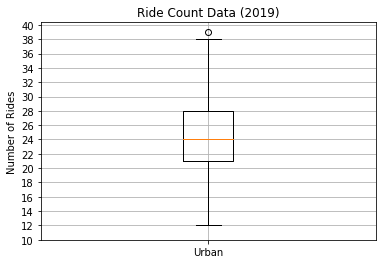

In [55]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

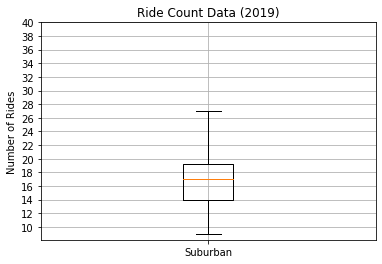

In [56]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

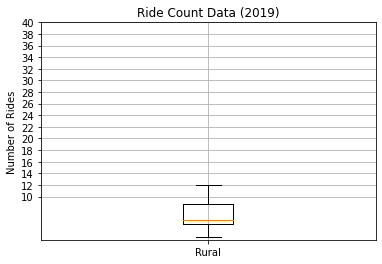

In [57]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

## Box-and-Whisker Plots for Ride Count Data

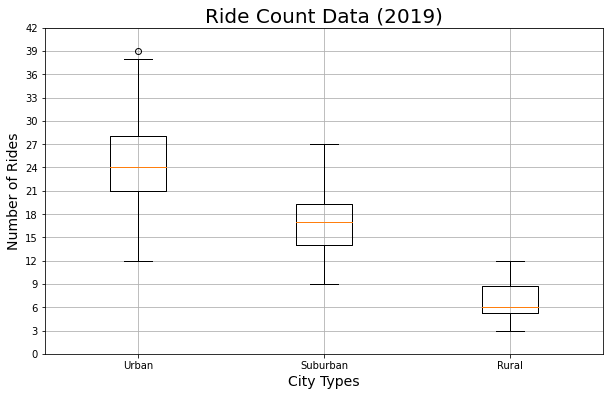

West Angela has the highest rider count.


In [58]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

## Box-and-Whisker Plots for Ride Fare Data

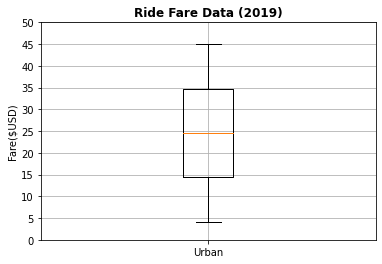

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [59]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontweight='bold')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

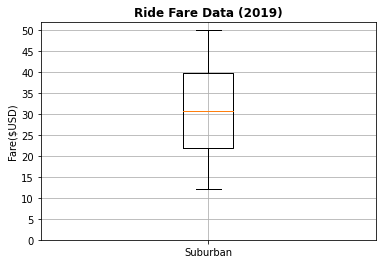

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [60]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontweight='bold')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

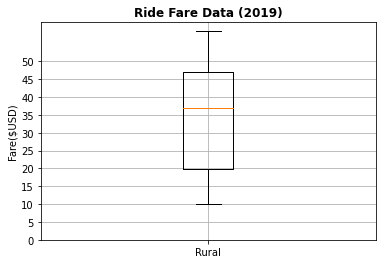

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [61]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontweight='bold')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

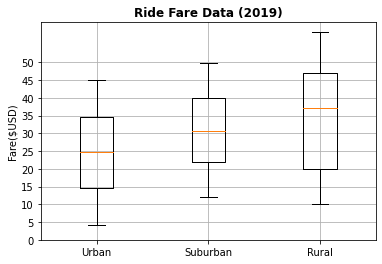

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [62]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ['Urban', 'Suburban', 'Rural']
fig, ax = plt.subplots()
fares_data=[urban_fares, suburban_fares, rural_fares]
ax.boxplot(fares_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontweight='bold')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

## Box-and-Whisker Plots for Driver Count Data

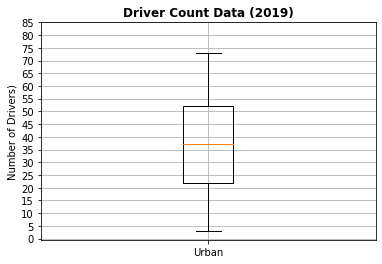

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [80]:
x_labels=['Urban']
fig, ax=plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontweight='bold')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

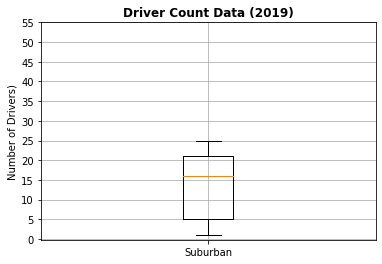

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [79]:
x_labels=['Suburban']
fig, ax=plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels,)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontweight='bold')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

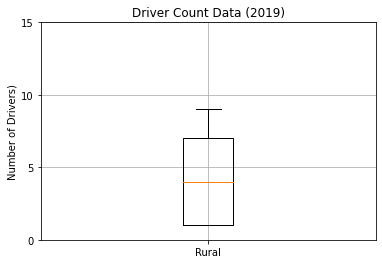

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [70]:
x_labels=['Rural']
fig, ax=plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 20, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

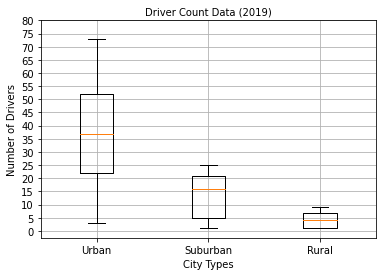

In [81]:
x_labels=['Urban', 'Suburban', 'Rural']
driver_count_data=[urban_drivers, suburban_drivers, rural_drivers]
fig,ax=plt.subplots()
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_title('Driver Count Data (2019)',fontsize=10)
ax.set_ylabel('Number of Drivers',fontsize=10)
ax.set_xlabel("City Types",fontsize=10)
ax.set_yticks(np.arange(0, 81, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

## Get the Percentage of Fares for Each City Type

In [82]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [83]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [84]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [85]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

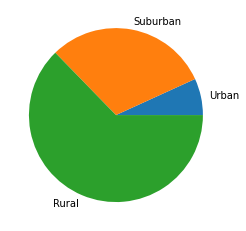

In [89]:
labels=['Urban', 'Suburban', 'Rural']
plt.pie(type_percents, labels= labels)
plt.show()

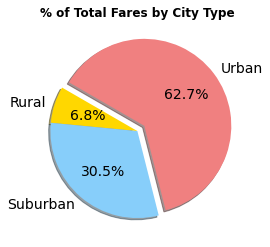

In [100]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150, textprops={'fontsize':14})
plt.title("% of Total Fares by City Type", fontweight='bold')
# Show Figure
plt.show()